In [3]:
#from __future__ import print_function
import sys
sys.path.append('/Users/rohaanadvani/Library/Python/2.7/site-packages'),
import vamp
import librosa
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from IPython.display import Audio


In [37]:
def Aud2Str(melody, threshold=1):
    string_out = []
    prev = melody[0]
    for i in range(1,len(melody)):
        curr = melody[i]
        diff = curr - prev
        # if curr < 0 means non-melody section, so we skip
        if curr >= 0:
            s = 's'
            if abs(diff) > threshold:
                s = 'u' if diff>0 else 'd'
                prev = curr
            string_out.append(s)
    return string_out

In [23]:
# melody is what vamp.collect() returns in data[vector], i.e. melody data
# default vamp hop size is 128/44100
# need to parse data according to desired_hop (in seconds)
# returns melody_desired
def parseMelody(melody, desired_hop):
    default_hop = 128/44100
    jump = int(desired_hop/default_hop)
    index = 0
    melody_desired = []
    while index < len(melody):
        melody_desired.append(melody[index])
        index = index + jump
    melody_desired = np.array(melody_desired)
    return melody_desired

In [39]:
# example of how to parse melody data
audio, sr = librosa.load('InMyFeelings.wav', sr=44100, mono=True)
# audio = audio[0:15*44100]  #if you want to analyze only section of song
Audio(audio, rate=sr)

data = vamp.collect(audio, sr, "mtg-melodia:melodia")
# data is a dictionary containing one item called "vector"
# vector is a tuple of two values: the hop size used for analysis and the array of pitch values
# Note that the hop size is *always* equal to 128/44100.0 = 2.9 ms
h, m = data['vector']

hop = 0.25  #desired hop in seconds
melody = parseMelody(m, hop)

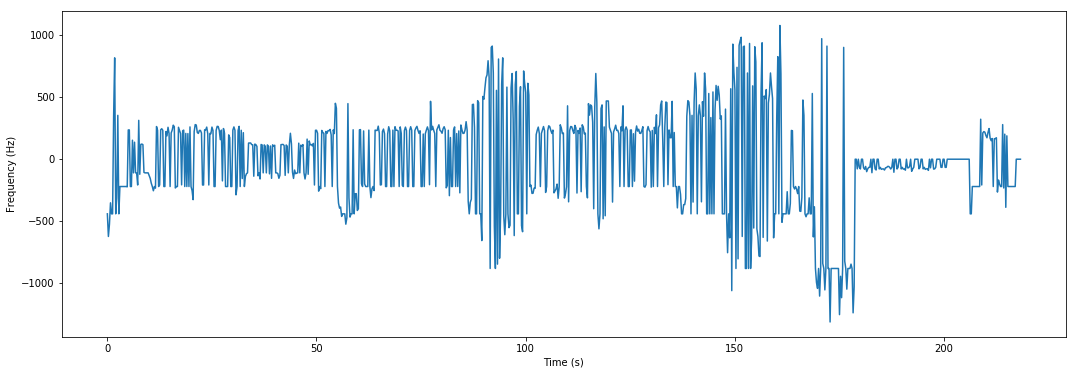

In [40]:
timestamps = 8 * 128/44100.0 + np.arange(len(melody)) * hop
# Melodia returns unvoiced (=no melody) sections as negative values. So by default, we get:
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
# plt.xlim(0, 15)
plt.show()

In [41]:
threshold = 1  # play with this to see how it affects performance- essentially if this is high, only larger melody changes will be noted
out = Aud2Str(melody, threshold)
print(out)

['u', 'u', 'd', 'd', 's', 'd', 'd', 'u', 'd', 'u', 'd', 'u', 'd', 'u', 'u', 'd', 'd', 'd', 'u', 'd', 'u', 'u', 'u', 'd', 'd', 'd', 'd', 'u', 'u', 'd', 'd', 'u', 'd', 'u', 'd', 'd', 'd', 'u', 's', 'd', 'u', 'd', 'u', 'd', 'u', 'd', 'u', 'd', 'u', 'u', 'd', 'd', 'd', 'u', 'u', 'd', 'd', 'd', 'u', 'u', 'd', 'd', 'u', 'd', 'd', 'd', 's', 's', 'd', 'd', 'u', 'd', 'd', 'u', 'd', 's', 'd', 'u', 'd', 'u', 'u', 'd', 'u', 'u', 's', 'u', 'd', 'u', 'd', 'u', 'u', 'd', 'u', 'd', 'd', 'u', 'u', 'd', 'd', 'u', 'd', 'u', 'u', 's', 'd', 'u', 'd', 'd', 'u', 'd', 'u', 'd', 'u', 'd', 'u', 'd', 'u', 'd', 'u', 'd', 'd', 'u', 'd', 'u', 's', 'd', 's', 'u', 'd', 'u', 'u', 'd', 'd', 'u', 'd', 'u', 'u', 'd', 's', 'd', 'u', 'd', 'u', 'u', 'd', 'u', 'u', 'd', 'd', 'u', 'u', 'd', 'd', 'u', 'd', 'u', 'u', 'u', 'd', 'u', 'd', 'u', 'd', 'd', 'u', 'u', 'u', 'd', 'd', 'd', 'u', 'u', 'd', 'd', 'd', 'u', 'u', 'd', 'u', 'u', 'd', 'd', 'u', 'u', 'u', 'd', 'u', 'u', 'd', 'u', 'd', 'u', 'd', 'u', 'u', 'u', 'u', 'd', 'u', 'u',